In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model
import matplotlib as mpl

In [2]:
data =pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx')
a = np.arange(2000,2018)
pop = [str(i)+'Pop' for i in a]
investment = [str(i)+'总投资金额(M)' for i in a]
inv_times = [str(i)+'总投资次数' for i in a]
gdp = [str(i)+'GDP' for i in a]
city=data['City'].drop_duplicates().values###获取城市
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题

In [3]:
def avglogZipfM(data,name1,cname,i):###横轴为排名，纵轴为投资金额或投资次数
    data1=data.fillna(0)
    inv=data1[name1[i]].values###得到投资金额或投资次数对的排名
    city=data['City'].drop_duplicates().values
    cp=dict(zip(city,inv))###dic(city,money/times)
    cpSortList = sorted( cp.items(),key = lambda x:x[1],reverse = True)
    y=[]
    x=[]
    cityName=[]
    for i in range(len(city)):
        if np.log10(cpSortList[i][1]) > 0:
            y.append(cpSortList[i][1])
            x.append(i)
            cityName.append(city[i])
    avgx=np.mean(x)###均值
    avgy=np.mean(y)
    X=np.log10(x/avgx)
    Y=np.log10(y/avgy)
    return(X,Y)

In [4]:
###########最小二乘拟合########3
### 6.最小二乘拟合
from scipy.optimize import leastsq  ##引入最小二乘法算法
from sklearn.metrics import r2_score
#需要拟合的函数func :指定函数的形状
def func(p,x):
    k,b=p
    return k*x+b

##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y
def picNH(Yt1,Yt2,num):
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)


In [5]:
def picNH2(Yt1,Yt2,num,num2):###主要是GDP要用
    ###过滤掉后面的尾巴
    yt1=[]
    yt2=[]
    for i in range(len(Yt1)):
        if Yt1[i]==-float('Inf') or Yt1[i]==float('Inf'):
            continue
        elif Yt1[i]<num and Yt1[i]>num2:
            yt1.append(Yt1[i])
            yt2.append(Yt2[i])
    #k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
    p0=[1,10]
    Xi=np.array(yt1)
    Yi=np.array(yt2)
    #把error函数中除了p0以外的参数打包到args中(使用要求)
    Para=leastsq(error,p0,args=(Xi,Yi))## 三个参数：误差函数、函数参数列表、数据点
    #读取结果
    k,b=Para[0] 
    y = [round(k*x+b,2) for x in yt1]
    k1=round(k, 2)
    r=r2_score(yt2,y)
    r2=round(r, 2)
    return(k,yt1,y)

D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
D:\Users\lu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


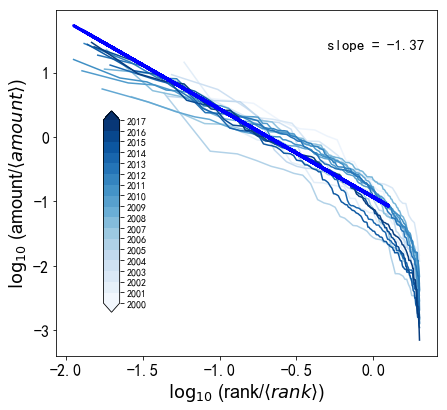

<Figure size 216x576 with 0 Axes>

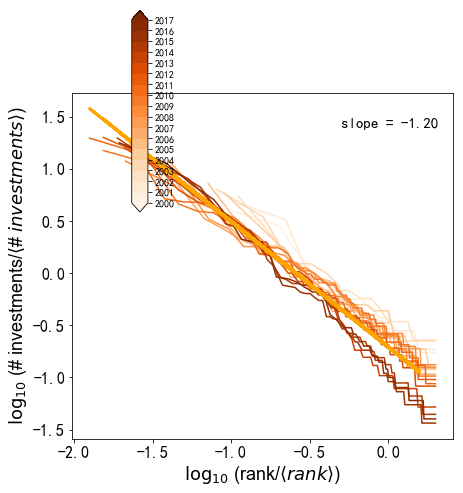

In [40]:
#### Amount 均值
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(15,14))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)

ax1 = plt.subplot(gs[0, 1:3])
zip_Ax=[]###保存所有城市17年间的数值
zip_Tx=[]
zip_Gx=[]
zip_Ay=[]###保存所有城市17年间的数值
zip_Ty=[]
zip_Gy=[]
###设置颜色
cm1 = list(sns.color_palette("Blues", 18))###蓝色

# plt.figure(figsize=(27,14))
# plt.subplot(231)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
    #设定X,Y轴标签和title
plt.tick_params(labelsize=16) #刻度字体大小13
for i in range(len(inv_times)):
    YT_A = avglogZipfM(data,investment,'amount',i)
    zip_Ax.extend(YT_A[0])###将所有年份的数据整合到一起
    zip_Ay.extend(YT_A[1])
    plt.plot(YT_A[0],YT_A[1],color=cm1[i])
nh_A = picNH(zip_Ax,zip_Ay,0.1)###得到拟合结果
plt.plot(nh_A[1],nh_A[2],color='blue',linewidth=3)
plt.text(-0.3, 1.37, 'slope = {}'.format("%.2f" % nh_A[0]),size=15)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
plt.ylabel('$\log_{10}$'+' (amount'+'/'+r'$\langle {} \rangle$'.format('amount')+')',font2)
fig2 = plt.figure(figsize=(3, 8))
cmap = mpl.cm.Blues###画颜色条
ax11 = fig.add_axes([0.38,0.58, 0.015, 0.2]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb1 = mpl.colorbar.ColorbarBase(ax11, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')

############
fig = plt.figure(figsize=(15,14))
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
ax2 = plt.subplot(gs[1, :2], )
plt.tick_params(labelsize=16) #刻度字体大小16
cm2 = list(sns.color_palette("Oranges", 18))###huang色
for i in range(len(inv_times)):
    YT_T=avglogZipfM(data,inv_times,'times',i)
    zip_Tx.extend(YT_T[0])###将所有年份的数据整合到一起
    zip_Ty.extend(YT_T[1])
    plt.plot(YT_T[0],YT_T[1],color=cm2[i],alpha=1)
nh_T = picNH(zip_Tx,zip_Ty,0.2)###得到拟合结果
plt.plot(nh_T[1],nh_T[2],color='orange',linewidth=3)
plt.text(-0.3, 1.4, 'slope = {}'.format("%.2f" % nh_T[0]),size=15)
plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
# plt.ylabel('$\log_{10}$'+' (# investments'+'/'+r'$\langle {} \rangle$'.format(r'inveatments')+')',font2)  
plt.ylabel('$\log_{10}$'+' (# investments'+'/'+r'$\langle {} $'.format('')+'# '+r'$ {} \rangle$'.format(r'investments')+')',font2) 
cmap = mpl.cm.Oranges###画颜色条
# fig = plt.figure(figsize=(3, 8))
ax22 = fig.add_axes([0.18, 0.35, 0.015, 0.2]) # 四个参数分别是左、下、宽、长
norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
cb2 = mpl.colorbar.ColorbarBase(ax22, cmap=cmap,
    norm=norm,
    boundaries= [2001] + bounds + [2018],
    extend='both',
    ticks=bounds,  # optional
    spacing='proportional',
    orientation='vertical')
# ###################
# ax3 = plt.subplot(gs[1, 2:])
# plt.tick_params(labelsize=16) #刻度字体大小13
# cm3 = list(sns.color_palette("Greens", 18))###huang色
# for i in range(len(inv_times)):
#     YT_G=avglogZipfM(data,gdp,'GDP',i)
#     zip_Gx.extend(YT_G[0])###将所有年份的数据整合到一起
#     zip_Gy.extend(YT_G[1])
#     plt.plot(YT_G[0],YT_G[1],color=cm3[i],alpha=0.3)
# nh_G = picNH2(zip_Gx,zip_Gy,0.1,-1.5)###得到拟合结果
# plt.plot(nh_G[1],nh_G[2],color='green',linewidth=3,alpha=1)
# plt.text(-0.25, 1, 'slope = {}'.format("%.2f" % nh_G[0]),size=15)
# plt.xlabel('$\log_{10}$'+' (rank'+'/'+r'$\langle {} \rangle$'.format('rank')+')',font2)
# plt.ylabel('$\log_{10}$'+' (GMP'+'/'+r'$\langle {} \rangle$'.format('GMP')+')',font2)

# # fig = plt.figure(figsize=(3, 8))
# cmap = mpl.cm.Greens###画颜色条
# ax33 = fig.add_axes([0.18, 0.15, 0.02, 0.5]) # 四个参数分别是左、下、宽、长
# norm = mpl.colors.Normalize(vmin=2000, vmax=2017)
# bounds = [ round(elem, 2) for elem in np.linspace(2000, 2017, 18)] # 
# cb3 = mpl.colorbar.ColorbarBase(ax33, cmap=cmap,
#     norm=norm,
#     boundaries= [2001] + bounds + [2018],
#     extend='both',
#     ticks=bounds,  # optional
#     spacing='proportional',
#     orientation='vertical')
# # plt.savefig('E:/vcdata/pic/picSC/Fig5_c(zipfGDP).pdf', bbox_inches='tight')
# plt.savefig('E:/0论文/0picture/5_910.png',dpi=500, bbox_inches='tight')